Jonathon Tordilla

11/11/19

# Neural Network Assignment

Option 3: Neural network tutorial library
For this assignment, I'll be doing option 3 and the advanced option. I also plan to learn the mathematical intricacies
of neural networks overall in order to modify the model effectively on my own with new hyperparameters. The tutorial
I'll be considering is: 

#     CITATION


[Neural Net Painter](https://github.com/ml4a/ml4a-guides/blob/master/notebooks/neural-net-painter.ipynb)


#   END CITATION

Which seems to involve creating a model which creates its own renditions of images. I'll complete this tutorial and 
then proceed to learn the intricacies of how neural networks work as well as how to modify the model used in the 
tutorial (if time permits). 

# Tutorial

What the Neural Net Painter notebook attempts to achieve is to 
"do regression from the color of a pixel in an image." The model 
then returns a generated image based off of the previous image 
without having to memorize the data. Instead, the model interpolates
the pixel and color values by using a 2 neuron input (x, y position)
and a 3 neuron output (color, rgb values). The loss function given
is a mean squared error identical to that of linear regression. 

#     CITATION


[Linear Regression and Neural Networks](https://towardsdatascience.com/a-gentle-journey-from-linear-regression-to-neural-networks-68881590760e)



#   END CITATION

In general, neural networks are essentially complex functions that 
we optimize in order to get our desired outputs. In a way, neural 
networks can be visualized as an extension of linear regression 
as the input-weight-output model of a neural network is similar to
a linear regression model for many inputs. This is because we can
create a multivariable function which takes inputs which correspond
to the inputs in a neural network. The weights in this example
are the coefficients of the function, so the overall model is: 

# f(i1, i2) = (w11  x  i1) + (w12  x  i2) = output

However, this model is not non-linear, which is an important assumption
whenever we are attempting to model regression with neural networks. 
In order to do this, we need to add an activation function "a." 

# f(i1, i2) = a((w11  x  i1) + (w12  x  i2)) = output

This is an oversimplified version of the actual model, but it draws 
similarities between ordinary linear regression and neural networks
and how they function. 

And so, this is essentially how the neural net painter program uses regression to plot images based on position inputs and rgb outputs. 

In [2]:
%matplotlib inline
import time
from PIL import Image
import numpy as np
import keras
from matplotlib.pyplot import imshow, figure
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([(

# Also Important

I had Miles' consent to use his picture for this assignment. It was really fun running this experiment with my friends in class. 

Obviously, the "Miles" portion of this tutorial was not included in the original, but I decided to include it in my project, as it only involved uploading a different picture and copying the given code. Although this does demonstrate comprehension of the ideas communicated by the tutorial, I don't see it as actual original code writing. 

data [[0.         0.        ]
 [0.00487805 0.        ]
 [0.0097561  0.        ]
 ...
 [0.98536585 0.99521531]
 [0.9902439  0.99521531]
 [0.99512195 0.99521531]]
labels [[ 90  97  56]
 [ 90  97  56]
 [ 90  97  56]
 ...
 [136 128  89]
 [140 135  95]
 [141 138  97]]


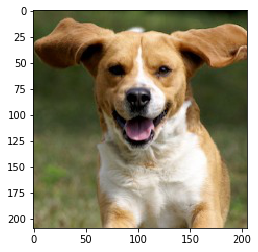

In [21]:
#Opening a image and converting it into a training set
#XY positions and RGB colors

def get_data(img):
    width, height = img.size
    pixels = img.getdata()
    x_data, y_data = [],[]
    for y in range(height):
        for x in range(width):
            idx = x + y * width
            r, g, b = pixels[idx]
            x_data.append([x / float(width), y / float(height)])
            y_data.append([r, g, b])
    x_data = np.array(x_data)
    y_data = np.array(y_data)
    return x_data, y_data

im1 = Image.open("dog.jpg")
x1, y1 = get_data(im1)

print("data", x1)
print("labels", y1)
imshow(im1)

data [[0.         0.        ]
 [0.00487805 0.        ]
 [0.0097561  0.        ]
 ...
 [0.98536585 0.99521531]
 [0.9902439  0.99521531]
 [0.99512195 0.99521531]]
labels [[119 111  74]
 [119 111  74]
 [120 115  77]
 ...
 [247 243 169]
 [247 243 169]
 [246 242 168]]


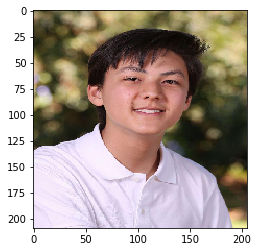

In [63]:
#I'll repeat the same process but for a different picture. 

im2 = Image.open("miles.jpg")
im2 = im2.resize(im1.size)
x2, y2 = get_data(im2)

print("data", x2)
print("labels", y2)
imshow(im2)

# Important

We'll use the Keras Sequential class to create a neural network. 
It will have 20-neuron layers with "ReLU" activations. 
What's especially notable is that the mean_squred error is the
loss function, which is essentially linear regression, as I mentioned
previously. 

In [23]:
def make_model():
    model = Sequential()
    model.add(Dense(2, activation='relu', input_shape=(2,)))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(3))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

m1 = make_model()

# Important

Now, it is necessary that we train the neural network (It's also 
the validation set, because it's a single picture). This is an 
experiment, so "overfitting" isn't really a concern. 

This trains for 25 epochs with a batch size of 5. 
An epoch is when all the training data is passed through the algo
and the weights are updated. The following function schedules this
to occur a total of 25 times. 
A batch is the number of samples processed before the epoch ends. 
Basically, it is less than or equal to the amount of samples in the
dataset. 

In [61]:
m1.fit(x1, y1, batch_size=5, epochs=25, verbose=1, 
       validation_data=(x1, y1))

Train on 42845 samples, validate on 42845 samples
Epoch 1/25
42845/42845 [==============================] - 23s 541us/step - loss: 709.8407 - val_loss: 656.6936
Epoch 2/25
42845/42845 [==============================] - 22s 513us/step - loss: 698.1056 - val_loss: 642.6836
Epoch 3/25
42845/42845 [==============================] - 23s 536us/step - loss: 687.9856 - val_loss: 665.7416
Epoch 4/25
42845/42845 [==============================] - 23s 547us/step - loss: 678.1862 - val_loss: 688.2613
Epoch 5/25
42845/42845 [==============================] - 23s 538us/step - loss: 665.4031 - val_loss: 627.3279
Epoch 6/25
42845/42845 [==============================] - 22s 523us/step - loss: 650.8322 - val_loss: 595.0744
Epoch 7/25
42845/42845 [==============================] - 27s 634us/step - loss: 630.4910 - val_loss: 573.2659
Epoch 8/25
42845/42845 [==============================] - 25s 587us/step - loss: 608.2801 - val_loss: 707.9884
Epoch 9/25
42845/42845 [==============================] - 25s 

In [12]:
#Now we can just take the training data to plot the new image. 

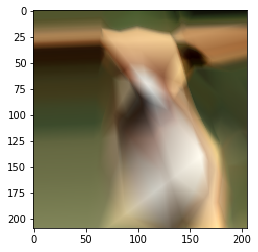

In [25]:
def generate_image(model, x, width, height): 
    img = Image.new("RGB", [width, height])
    pixels = img.load()
    y_pred = model.predict(x)
    for y in range(height):
        for x in range(width):
            idx = x + y * width
            r, g, b = y_pred[idx]
            pixels[x, y] = (int(r), int(g), int(b))
    return img

img = generate_image(m1, x1, im1.width, im1.height)
imshow(img)

In [65]:
m2 = make_model()

In [66]:
m2.fit(x2, y2, batch_size=5, epochs=25, verbose=1, 
       validation_data=(x2, y2))

Train on 42845 samples, validate on 42845 samples
Epoch 1/25
42845/42845 [==============================] - 26s 604us/step - loss: 3573.6572 - val_loss: 2858.1010
Epoch 2/25
42845/42845 [==============================] - 22s 509us/step - loss: 2674.4026 - val_loss: 2336.6951
Epoch 3/25
42845/42845 [==============================] - 26s 611us/step - loss: 2128.2641 - val_loss: 1882.8339
Epoch 4/25
42845/42845 [==============================] - 22s 525us/step - loss: 1720.4872 - val_loss: 1522.4357
Epoch 5/25
42845/42845 [==============================] - 22s 519us/step - loss: 1488.2500 - val_loss: 1780.2333
Epoch 6/25
42845/42845 [==============================] - 23s 543us/step - loss: 1377.9182 - val_loss: 1222.3152
Epoch 7/25
42845/42845 [==============================] - 23s 542us/step - loss: 1285.5096 - val_loss: 1112.8384
Epoch 8/25
42845/42845 [==============================] - 24s 560us/step - loss: 1221.0754 - val_loss: 1606.5524
Epoch 9/25
42845/42845 [======================

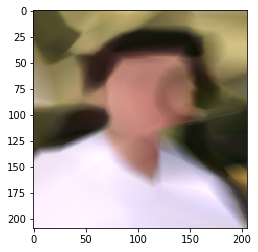

In [67]:
img2 = generate_image(m2, x2, im2.width, im2.height)
imshow(img2)

In [50]:
im3 = Image.open("kitty.jpg")
im3 = im3.resize(im1.size)
x3, y3 = get_data(im3)

data [[0.         0.        ]
 [0.00487805 0.        ]
 [0.0097561  0.        ]
 ...
 [0.98536585 0.99521531]
 [0.9902439  0.99521531]
 [0.99512195 0.99521531]]
labels [[ 37  68  36]
 [ 37  68  36]
 [ 37  67  33]
 ...
 [141 133 114]
 [161 152 135]
 [187 177 165]]


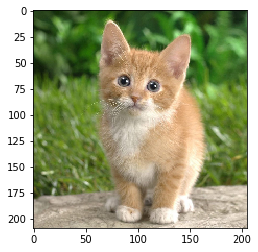

In [51]:
print("data", x3)
print("labels", y3)
imshow(im3)

In [52]:
m3 = make_model()

In [53]:
m3.fit(x3, y3, batch_size=5, epochs=25, verbose=1, 
       validation_data=(x3, y3))

Train on 42845 samples, validate on 42845 samples
Epoch 1/25
42845/42845 [==============================] - 22s 522us/step - loss: 2588.4010 - val_loss: 2304.8958
Epoch 2/25
42845/42845 [==============================] - 21s 492us/step - loss: 2330.1577 - val_loss: 2285.0735
Epoch 3/25
42845/42845 [==============================] - 21s 494us/step - loss: 2302.9324 - val_loss: 2257.0289
Epoch 4/25
42845/42845 [==============================] - 21s 491us/step - loss: 2273.9419 - val_loss: 2221.0724
Epoch 5/25
42845/42845 [==============================] - 21s 496us/step - loss: 2146.5974 - val_loss: 1834.2678
Epoch 6/25
42845/42845 [==============================] - 21s 501us/step - loss: 1494.3359 - val_loss: 1294.8896
Epoch 7/25
42845/42845 [==============================] - 21s 496us/step - loss: 1247.5262 - val_loss: 1145.4174
Epoch 8/25
42845/42845 [==============================] - 20s 470us/step - loss: 1133.2216 - val_loss: 1039.8462
Epoch 9/25
42845/42845 [======================

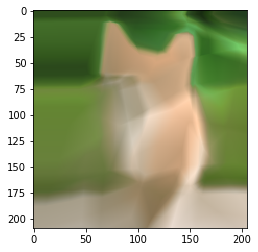

In [54]:
img3 = generate_image(m3, x3, im3.width, im3.height)
imshow(img3)

# Explanation

I'm "auto-normalizing" each frame outputted below, meaning that I'm rescaling the min and max output colors to 0-255. Some of the intermediate models generated output in different ranges, and we don't want this to show as we only want to see the ranges which are identical to our dog and cat models. This will allow us to see a nice gradient from the dog to cat pictures generated by the model. 

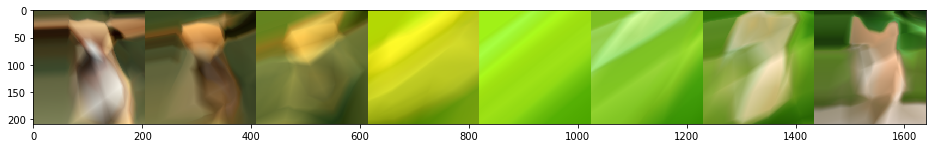

In [56]:
def get_interpolated_weights(model1, model2, amt):
    w1 = np.array(model1.get_weights())
    w2 = np.array(model2.get_weights())
    w3 = np.add((1.0 - amt) * w1, amt * w2)
    return w3

def generate_image_rescaled(model, x, width, height):
    img = Image.new("RGB", [width, height])
    pixels = img.load()
    y_pred = model.predict(x)
    y_pred = 255.0 * (y_pred - np.min(y_pred)) / (np.max(y_pred) - np.min(y_pred))
    for y in range(height):
        for x in range(width):
            idx = x + y * width
            r, g, b = y_pred[idx]
            pixels[x, y] = (int(r), int(g), int(b))
    return img


m4 = make_model()

n = 8
interpolated_images = []
for i in range(n):
    amt = float(i)/(n-1.0)
    w3 = get_interpolated_weights(m1, m3, amt)
    m4.set_weights(w3)
    img = generate_image_rescaled(m4, x1, im1.width, im1.height)
    interpolated_images.append(img)

full_image = np.concatenate(interpolated_images, axis=1)
figure(figsize=(16,4))
imshow(full_image)

# The following code is commented out because I don't want to accidently execute the block again... 

In [59]:
#Now I'm going to create a video file which animates the transition

#n = 120
#frames_dir = '../assets/neural-painter-frames'
#video_path = '../neural-painter-interpolation.mp4'

#import os
#if not os.path.isdir(frames_dir):
    #os.makedirs(frames_dir)

#for i in range(n):
    #amt = float(i)/(n-1.0)
    #w3 = get_interpolated_weights(m1, m3, amt)
    #m4.set_weights(w3)
    #img = generate_image_rescaled(m4, x1, im1.width, im1.height)
    #img.save('frame%04d.png'%i)

    #The above code creates frames and saves it in the folder

#cmd = 'ffmpeg -i %s/frame%%04d.png -c:v libx264 -pix_fmt yuv420p %s' % (frames_dir, video_path)
#os.system(cmd)

32512

# THE NEXT SECTION SHOWS THE QUESTIONS AND ANSWERS FOR THIS ASSIGNMENT

# Questions

1. What type of data are they using?
2. What conversions (if any) had to be done to the data before it could be put into the neural network?
3. What is the output of the neural network, both in terms of what it looks like to the computer (e.g. integers in the range [0-2]) and how humans should interpret it (e.g. the type of iris)?
4. How many hidden layers does the network have, and what type are they (e.g. fully connected, convolutional, recurrent, LSTM, sparse, etc.)?
5. What activation function(s) does it use?
6. What loss or cost function is it using?
7. What kind of validation (if any) are they using?
8. What other validation methods might work for this type of problem?
9. Why do you think the authors may have chosen this architecture for their network?
10. Are there any changes you might try, if you were going to improve on their model?

# Answers

1. The tutorial uses the two pictures "dog.jpg" and "kitty.jpg" as data for the model. 
2. The data is converted into values that represent the "xy" positions of the pixels and their "rgb" values. The image is also resized. I did not initially resize the "miles.jpg" image, and it took about 90 minutes to train, so resizing the data to allow for expedited training is important. 
3. The output of the neural network is the model's generated version of the original image. Using the training set, the model attempts to represent the data as close as possible without making an exact copy of it by recognizing patterns during every epoch. The result is a blurry and often unrecognizable image (see the result for "miles.jpg"), but it's an interesting way to visualize linear regression in a neural network context (I explained the correlation between the basic structure of a neural network and linear regression in a previous section of this notebook). 
4. This network has 7 hidden layers (layers which are not the input or output) which are of the Sequential type. This is shown in the function "make_model" which states that the model is of type "Sequential" and that 20-neuron layers are added with the activation type "ReLU." 

# Citation
[ReLU Concepts Explained](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/)
# End Citation

5. As stated in the fourth answer, the network uses a "ReLU" activation type, also known as the "Rectified Linear Unit." It is a piecewise linear function which directly outputs positive input values. Otherwise, the ReLU outputs zero. Basically, because it is piecewise, it can be described with the if-statements: 

In [70]:
def ReLU(input):
    if input > 0:
        return input
    else: 
        return 0

But in reality, the rectified function actually looks like this: 

In [76]:
def rectified(x):
    return max(0.0, x)

x = 1.0
print('rectified({}) is {}'.format(x, rectified(x)))
x = 0.0
print('rectified({}) is {}'.format(x, rectified(x)))
x = -2.3
print('rectified({}) is {}'.format(x, rectified(x)))

rectified(1.0) is 1.0
rectified(0.0) is 0.0
rectified(-2.3) is 0.0


You can see that it returned the input for values greater than 0, and that it returned 0 otherwise. 
6. The loss function that the network uses is a "mean_squared_error" which shows the error between the predicted values and the original values from the image. This can also be found in the "make_model" function above. 
7. When using the "fit" function to train the model, the "validation_data" argument is used to calculate the loss in relation to the validation dataset after each epoch. However in this case, the validation and input datasets are identical. The validation that is done on the generated image is not completed in the same way that I've had experience with. Instead, the training set is also the validation set, as we are comparing the generated data to the original picture, which was also the data used to train the network. 
8. Precision-recall and F-measure can be used for validating generated images by neural networks, but none of these would be especially useful for this experiment, as our validation dataset is the same as our training data. This leads to overfitting, but that's really none of our concern for this experiment, as it's only used as an interesting visual representation of regression. Therefore, any validation method won't be of much use to the programmer. 
9. The ReLU activation function allows for efficient training because of its simplicity, but it makes more sense to use a convolutional network instead of a sequential/recurrent one, as convolutional neural networks are often better suited for analyzing images in grids due to its mathematical operation, the "convolution" which has a wide range of image and natural language processing applications. 
10. I might try to implement a convolutional neural network in order to create a version of this tutorial which trains on multiple pictures of a person and is eventually able to classify them if another picture is shown to the model. An easier modification would be to recreate the tutorial by adding more hidden layers. 

For this final part of the assignment, I'll use my own picture as a training set for the network. I'll add more layers and see how it compares. I'll then attempt to create a convolutional neural network. 

# CITATION

[Convolutional Neural Network](https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5)

# END CITATION

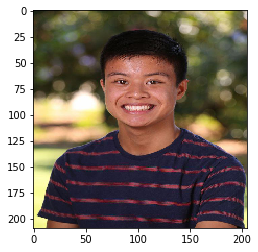

In [78]:
image = Image.open('jonathon.jpg')
image = image.resize(im1.size)
x_1, y_1 = get_data(image)

imshow(image)

For my first test model, I'll simply try to add more hidden layers (double the previous amount) and neurons (adding five more neurons).

In [83]:
def make_test_model(): 
    model = Sequential()
    
    model.add(Dense(2, activation='relu', input_shape=(2,)))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(3))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [86]:
model = make_test_model()

In [88]:
model.fit(x_1, y_1, batch_size=5, epochs=25, verbose=1, validation_data=(x1, y1))

Train on 42845 samples, validate on 42845 samples
Epoch 1/25
42845/42845 [==============================] - 34s 796us/step - loss: 1914.2296 - val_loss: 8083.3133
Epoch 2/25
42845/42845 [==============================] - 34s 797us/step - loss: 1672.8911 - val_loss: 8386.7989
Epoch 3/25
42845/42845 [==============================] - 33s 767us/step - loss: 1471.1228 - val_loss: 8645.1523
Epoch 4/25
42845/42845 [==============================] - 37s 860us/step - loss: 1348.6558 - val_loss: 8500.9754
Epoch 5/25
42845/42845 [==============================] - 31s 718us/step - loss: 1246.1819 - val_loss: 8355.5268
Epoch 6/25
42845/42845 [==============================] - 31s 717us/step - loss: 1162.8535 - val_loss: 8700.4934
Epoch 7/25
42845/42845 [==============================] - 31s 717us/step - loss: 1122.7012 - val_loss: 9000.2601
Epoch 8/25
42845/42845 [==============================] - 34s 788us/step - loss: 1074.2618 - val_loss: 9442.9872
Epoch 9/25
42845/42845 [======================

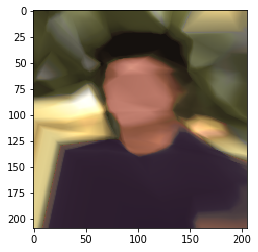

In [90]:
jonathon_image = generate_image(model, x_1, 
                                image.width, 
                                image.height)
imshow(jonathon_image)

I will now make similar edits, but this time I'll double the amount of neurons and add three more hidden layers. 

In [91]:
def make_test_model_2(): 
    model = Sequential()
    
    model.add(Dense(2, activation='relu', input_shape=(2,)))
    
    model.add(Dense(40, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(40, activation='relu'))
    
    model.add(Dense(3))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [92]:
model_2 = make_test_model_2()

In [98]:
model_2.fit(x_1, y_1, batch_size=5, epochs=25, verbose=1, validation_data=(x1, y1))

Train on 42845 samples, validate on 42845 samples
Epoch 1/25
42845/42845 [==============================] - 33s 780us/step - loss: 1745.1226 - val_loss: 8225.3743
Epoch 2/25
42845/42845 [==============================] - 32s 756us/step - loss: 1683.5892 - val_loss: 8759.5674
Epoch 3/25
42845/42845 [==============================] - 31s 728us/step - loss: 1625.0612 - val_loss: 8898.4526
Epoch 4/25
42845/42845 [==============================] - 31s 723us/step - loss: 1585.3325 - val_loss: 8047.0895
Epoch 5/25
42845/42845 [==============================] - 31s 723us/step - loss: 1488.2593 - val_loss: 8635.8548
Epoch 6/25
42845/42845 [==============================] - 32s 738us/step - loss: 1367.4209 - val_loss: 9617.6883
Epoch 7/25
42845/42845 [==============================] - 31s 724us/step - loss: 1250.2389 - val_loss: 8729.9260
Epoch 8/25
42845/42845 [==============================] - 32s 753us/step - loss: 1139.7690 - val_loss: 9273.0695
Epoch 9/25
42845/42845 [======================

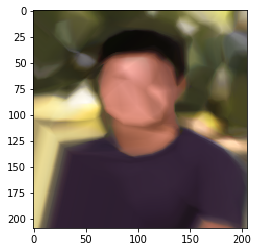

In [101]:
jonathon_image_2 = generate_image(model_2, x_1, 
                                image.width, 
                                image.height)
imshow(jonathon_image_2)

The result shows my face more clearly than the previous model. Thus concludes option 3 and option 3 (advanced). 

# ALL CITATIONS 

[Neural Net Painter](https://github.com/ml4a/ml4a-guides/blob/master/notebooks/neural-net-painter.ipynb)

[Linear Regression and Neural Networks](https://towardsdatascience.com/a-gentle-journey-from-linear-regression-to-neural-networks-68881590760e)

[ReLU Concepts Explained](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/)

[Convolutional Neural Network](https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5)

# END ALL CITATIONS